<a href="https://colab.research.google.com/github/maavistar/hello-world/blob/master/CF_Microbiome_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1aU9-VffFEZrcB5yG4QzqYJ-4QfW59X2E # sample info
!gdown --id 1Jmp4PvgPy8YjaiOcFa7baY-3tkCZO9Vs # taxonomic data
!gdown --id 1jeHFeaApOIBOjr71TvnxbYfvzEU5ZJ3v # count matrix
!gdown --id 1iNQpFfidd5giZ1Hg7ItrVPvayNYN9SG9 # clustered data
!gdown --id 1RnkL8i3PkqfseIZHLFSuSwRuLeSc4Bnl # clustered names

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1aU9-VffFEZrcB5yG4QzqYJ-4QfW59X2E
To: /content/sample_info.txt
100% 34.7k/34.7k [00:00<00:00, 32.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Jmp4PvgPy8YjaiOcFa7baY-3tkCZO9Vs
To: /content/taxonomic_data.txt.taxonomy
100% 7.03M/7.03M [00:00<00:00, 76.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Down

In [ ]:
sample_data = pd.read_table("sample_info.txt")
taxonomic_data = pd.read_table("taxonomic_data.txt.taxonomy", header=None)
count_matrix = pd.read_table("count_table.txt.count_table")
clustered_data = pd.read_table("clustered_names.txt.names", header=None)

In [ ]:
count_matrix

,Representative_Sequence,total,13507.RTSF.NTC1,13507.RTSF.NTC2,13507.RTSF.NTC3,13507.SD200.N,13507.SD200.T,13507.SD231.N,13507.SD231.T,13507.SD239.N,...,13507.SH036.N,13507.SH036.T,13507.SH037.N,13507.SH037.T,13507.SH038.N,13507.SH038.T,13507.SH039.N,13507.SH039.T,13507.SH043.N,13507.SH043.T
0,13507.RTSF.NTC1_0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13507.RTSF.NTC1_1,15,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13507.RTSF.NTC1_2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13507.RTSF.NTC1_3,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13507.RTSF.NTC1_4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276863,13507.SH043.T_18243,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
276864,13507.SH043.T_18245,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
276865,13507.SH043.T_18247,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
276866,13507.SH043.T_18248,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Cleaning Up Taxonomic Data

In [ ]:
def remove_bacteria(taxonomy_str):
  new_tax = taxonomy_str.split(";")
  new_tax = new_tax[1:]
  return new_tax

taxonomic_data.columns = ["rep_seq", "bact_comp"]

taxonomic_data["new_bact_comp"] = taxonomic_data["bact_comp"].apply(remove_bacteria)
print(taxonomic_data)

                   rep_seq                                          bact_comp  \
0       13507.RTSF.NTC1_35  Bacteria(98);Bacteria_unclassified(98);Bacteri...   
1       13507.RTSF.NTC1_16  Bacteria(100);"Proteobacteria"(93);Deltaproteo...   
2      13507.RTSF.NTC1_301  Bacteria(100);"Verrucomicrobia"(100);Spartobac...   
3       13507.RTSF.NTC1_82  Bacteria(100);"Bacteroidetes"(100);"Sphingobac...   
4      13507.RTSF.NTC1_312  Bacteria(100);"Bacteroidetes"(100);"Sphingobac...   
...                    ...                                                ...   
45944  13507.SH043.T_15365  Bacteria(97);Firmicutes(90);Clostridia(86);Clo...   
45945  13507.SH043.T_15355  Bacteria(99);"Bacteroidetes"(99);"Bacteroidia"...   
45946  13507.SH043.T_15334  Bacteria(100);"Bacteroidetes"(99);"Bacteroidia...   
45947  13507.SH043.T_17263  Bacteria(100);"Bacteroidetes"(99);"Bacteroidia...   
45948  13507.SH043.T_17210  Bacteria(100);"Proteobacteria"(100);Gammaprote...   

                           

In [ ]:
def extract_genus(tax_list):
  genus = tax_list[-2].split("(")[0]
  return genus

taxonomic_data["genus"] = taxonomic_data["new_bact_comp"].apply(extract_genus)

In [ ]:
def extract_family(tax_list):
  family = tax_list[-3].split("(")[0]
  return family

taxonomic_data["family"] = taxonomic_data["new_bact_comp"].apply(extract_family)

In [ ]:
def extract_order(tax_list):
  order = tax_list[-4].split("(")[0]
  return order

taxonomic_data["order"] = taxonomic_data["new_bact_comp"].apply(extract_order)

In [ ]:
def extract_class(tax_list):
  cl = tax_list[-5].split("(")[0]
  return cl

taxonomic_data["clas"] = taxonomic_data["new_bact_comp"].apply(extract_class)

In [ ]:
def extract_phylum(tax_list):
  phylum = tax_list[-6].split("(")[0]
  return phylum

taxonomic_data["phylum"] = taxonomic_data["new_bact_comp"].apply(extract_phylum)

In [ ]:
def extract_patient_id(tax_list):
  patient_id = tax_list.split("_")[0]
  return patient_id

taxonomic_data["patient_id"] = taxonomic_data["rep_seq"].apply(extract_patient_id)
first_column = taxonomic_data.pop("patient_id")
taxonomic_data.insert(0,"patient_id",first_column)

In [ ]:
count_matrix.sort_values("total").tail(5)
count_matrix.index=count_matrix.Representative_Sequence
count_matrix.drop(["Representative_Sequence", "total"], inplace=True, axis=1)

Formatting Dataframes (transformation into total counts)

In [ ]:
# There's a whole count matrix (count of every single possible raw sequence).
# However, taxonomy has only been assigned to the representative sequences.

cluster_dict = dict()

for i in range(len(clustered_data)):
  rep_seq = clustered_data.iloc[i][0]
  list_of_seqs = clustered_data.iloc[i][1].split(',')
  for seq in list_of_seqs:
    cluster_dict[seq] = rep_seq

aggregated_count_matrix = count_matrix.groupby(cluster_dict, axis=0).sum()

# only sequence ids that are in both datasets
taxonomic_data.index = taxonomic_data.rep_seq
taxonomic_data.loc[aggregated_count_matrix.index]

# same order of sample names in count matrix and sample data
sample_data.index = sample_data.sample_name
aggregated_count_matrix = aggregated_count_matrix[sample_data.index]

**Results/Analysis**

*FEV1 Correlation with bacteria clusters*

In [ ]:
# calculating significance value

seq_list = []
count = 0

for index in range(len(clustered_data)):
  seq_list = clustered_data[1][index].split(",")
  if len(seq_list) >= 300:
    count += 1
  seq_list = []

print(count)
a_level = 0.05/count
print(a_level)

124
0.0004032258064516129


9.863620411774632e-07
13507.SD239.T_13466
0.6620662013756244


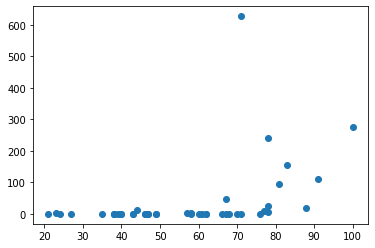

In [ ]:
from scipy import stats

fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues = []
bacteria_names = []
corr_values = []
for bact_name in aggregated_count_matrix.index:
  bacteria_counts = aggregated_count_matrix.loc[bact_name]
  result = stats.spearmanr(fev1, bacteria_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues.append(result.pvalue)
    bacteria_names.append(bact_name)
    corr_values.append(result.correlation)

min_index = np.argmin(pvalues)
print(pvalues[min_index])
print(bacteria_names[min_index])
print(corr_values[min_index])

bacteria_counts = aggregated_count_matrix.loc[bacteria_names[min_index]]
plt.scatter(fev1, bacteria_counts)

In [ ]:
for x in bacteria_names:
  print(taxonomic_data.loc[x]['genus'])

Leptotrichia
Fusobacterium
"Bacteroidetes"_unclassified
Actinomyces


In [ ]:
print(corr_values)
print(pvalues)

[0.5165218005145228, 0.6620662013756244, 0.510383665646863, 0.5506738325463627]
[0.0003314703253426188, 9.863620411774632e-07, 0.0004008705565842596, 0.0001074451812534369]


Text(0.5, 1.0, 'Correlation of Actinomyces Bacteria Cluster with FEV1')

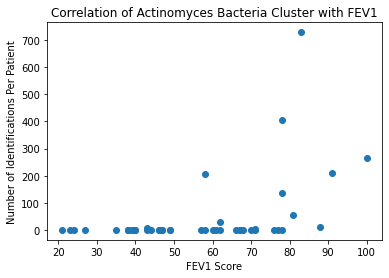

In [ ]:
bacteria_counts = aggregated_count_matrix.loc[bacteria_names[3]]
plt.scatter(fev1, bacteria_counts)
plt.xlabel("FEV1 Score")
plt.ylabel("Number of Identifications Per Patient")
plt.title("Correlation of Actinomyces Bacteria Cluster with FEV1")

*FEV1 Correlation with genus, family, order, class, phylum*

In [ ]:
genus_dict = dict()
for rep_seq in taxonomic_data.index:
  genus = taxonomic_data.loc[rep_seq].genus
  genus_dict[rep_seq] = genus

genus_aggregated_count_matrix = aggregated_count_matrix.groupby(genus_dict).sum()

genus_aggregated_count_matrix = genus_aggregated_count_matrix[sample_data.index]

['"Leptotrichiaceae"_unclassified']
0.00014362564848371704
"Leptotrichiaceae"_unclassified
0.5422189824883277


Text(0.5, 1.0, 'Correlation of Leptotrichiaceae Genus with FEV1')

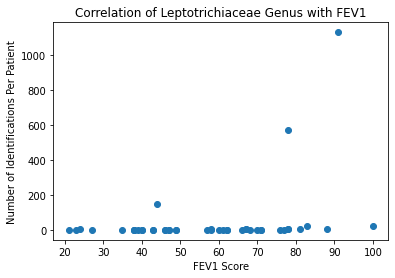

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_genus = []
genus_names = []
corr_genus = []

for genus in genus_aggregated_count_matrix.index:
  genus_counts = genus_aggregated_count_matrix.loc[genus]
  result = stats.spearmanr(fev1, genus_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_genus.append(result.pvalue)
    genus_names.append(genus)
    corr_genus.append(result.correlation)

print(genus_names)

min_index = np.argmin(pvalues_genus)
print(pvalues_genus[min_index])
print(genus_names[min_index])
print(corr_genus[min_index])

genus_counts = genus_aggregated_count_matrix.loc[genus_names[min_index]]
plt.scatter(fev1, genus_counts)
plt.xlabel("FEV1 Score")
plt.ylabel("Number of Identifications Per Patient")
plt.title("Correlation of Leptotrichiaceae Genus with FEV1")

In [ ]:
family_dict = dict()
for rep_seq in taxonomic_data.index:
  family = taxonomic_data.loc[rep_seq].family
  family_dict[rep_seq] = family

family_aggregated_count_matrix = aggregated_count_matrix.groupby(family_dict).sum()

family_aggregated_count_matrix = family_aggregated_count_matrix[sample_data.index]

['Enterobacteriaceae']
0.00023382407694558626
Enterobacteriaceae
0.5274953805752751


Text(0.5, 1.0, 'Correlation of Enterobacteriaceae Family with FEV1')

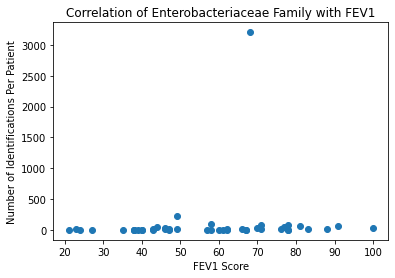

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_family = []
family_names = []
corr_family = []

for family in family_aggregated_count_matrix.index:
  family_counts = family_aggregated_count_matrix.loc[family]
  result = stats.spearmanr(fev1, family_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_family.append(result.pvalue)
    family_names.append(family)
    corr_family.append(result.correlation)

print(family_names)

min_index = np.argmin(pvalues_family)
print(pvalues_family[min_index])
print(family_names[min_index])
print(corr_family[min_index])

family_counts = family_aggregated_count_matrix.loc[family_names[min_index]]
plt.scatter(fev1, family_counts)
plt.xlabel("FEV1 Score")
plt.ylabel("Number of Identifications Per Patient")
plt.title("Correlation of Enterobacteriaceae Family with FEV1")

In [ ]:
order_dict = dict()
for rep_seq in taxonomic_data.index:
  order = taxonomic_data.loc[rep_seq].order
  order_dict[rep_seq] = order

order_aggregated_count_matrix = aggregated_count_matrix.groupby(order_dict).sum()

order_aggregated_count_matrix = order_aggregated_count_matrix[sample_data.index]

['"Enterobacteriales"']
0.00023382407694558626
"Enterobacteriales"


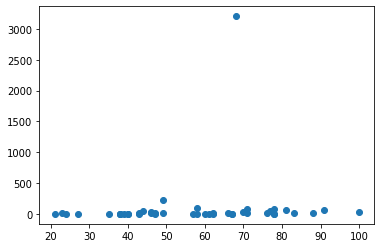

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_order = []
order_names = []

for order in order_aggregated_count_matrix.index:
  order_counts = order_aggregated_count_matrix.loc[order]
  result = stats.spearmanr(fev1, order_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_order.append(result.pvalue)
    order_names.append(order)

print(order_names)

min_index = np.argmin(pvalues_order)
print(pvalues_order[min_index])
print(order_names[min_index])

order_counts = order_aggregated_count_matrix.loc[order_names[min_index]]
plt.scatter(fev1, order_counts)

In [ ]:
clas_dict = dict()
for rep_seq in taxonomic_data.index:
  clas = taxonomic_data.loc[rep_seq].clas
  clas_dict[rep_seq] = clas

clas_aggregated_count_matrix = aggregated_count_matrix.groupby(clas_dict).sum()

clas_aggregated_count_matrix = clas_aggregated_count_matrix[sample_data.index]

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_clas = []
clas_names = []

for clas in clas_aggregated_count_matrix.index:
  clas_counts = clas_aggregated_count_matrix.loc[clas]
  result = stats.spearmanr(fev1, clas_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_clas.append(result.pvalue)
    clas_names.append(clas)

print(clas_names)

#min_index = np.argmin(pvalues_clas)
#print(pvalues_clas[min_index])
#print(clas_names[min_index])

#bacteria_counts = clas_aggregated_count_matrix.loc[clas_names[min_index]]
#plt.scatter(fev1, clas_counts)

[]


In [ ]:
phylum_dict = dict()
for rep_seq in taxonomic_data.index:
  phylum = taxonomic_data.loc[rep_seq].phylum
  phylum_dict[rep_seq] = phylum

phylum_aggregated_count_matrix = aggregated_count_matrix.groupby(phylum_dict).sum()

phylum_aggregated_count_matrix = phylum_aggregated_count_matrix[sample_data.index]

In [ ]:
fev1 = pd.to_numeric(sample_data.fev1, errors='coerce')
pvalues_phylum = []
phylum_names = []

for phylum in phylum_aggregated_count_matrix.index:
  phylum_counts = phylum_aggregated_count_matrix.loc[phylum]
  result = stats.spearmanr(fev1, phylum_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_phylum.append(result.pvalue)
    phylum_names.append(phylum)

print(phylum_names)

#min_index = np.argmin(pvalues_phylum)
#print(pvalues_phylum[min_index])
#print(phylum_names[min_index])

#bacteria_counts = phylum_aggregated_count_matrix.loc[phylum_names[min_index]]
#plt.scatter(fev1, phylum_counts)

[]


Correlations with FEV1/FVC Ratio

In [ ]:
ratio_list = [0] * 51
ratio_list[0] = 'n/a'
ratio_list[1] = 'n/a'
ratio_list[2] = 'n/a'
ratio_list[-1] = 'n/a'
ratio_list[-5] = 'n/a'
ratio_list[-13] = 'n/a'
ratio_list[-19] = 'n/a'

for row in range(51):
  if ratio_list[row] != 'n/a':
    ratio_list[row] = [int(sample_data["fev1"].iloc[row])/int(sample_data["fvc"].iloc[row])]

ratio_list

sample_data["ratio"] = [0] * 51
sample_data.iloc[0] = 'n/a'
sample_data.iloc[1] = 'n/a'
sample_data.iloc[2] = 'n/a'
sample_data.iloc[-1] = 'n/a'
sample_data.iloc[-5] = 'n/a'
sample_data.iloc[-13] = 'n/a'
sample_data.iloc[-19] = 'n/a'

for row in range(51):
  if ratio_list[row] != 'n/a':
    sample_data["ratio"].iloc[row] = (float(ratio_list[row][0])) * 100

In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues = []
bacteria_names = []
for bact_name in aggregated_count_matrix.index:
  bacteria_counts = aggregated_count_matrix.loc[bact_name]
  result = stats.spearmanr(ratio, bacteria_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues.append(result.pvalue)
    bacteria_names.append(bact_name)

print(bacteria_names)

#min_index = np.argmin(pvalues)
#print(pvalues[min_index])
#print(bacteria_names[min_index])

#bacteria_counts = aggregated_count_matrix.loc[bacteria_names[min_index]]
#plt.scatter(ratio, bacteria_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_genus = []
genus_names = []

for genus in genus_aggregated_count_matrix.index:
  genus_counts = genus_aggregated_count_matrix.loc[genus]
  result = stats.spearmanr(ratio, genus_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_genus.append(result.pvalue)
    genus_names.append(genus)

print(genus_names)

#min_index = np.argmin(pvalues_genus)
#print(pvalues_genus[min_index])
#print(genus_names[min_index])

#bacteria_counts = genus_aggregated_count_matrix.loc[genus_names[min_index]]
#plt.scatter(ratio, genus_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_family = []
family_names = []

for family in family_aggregated_count_matrix.index:
  family_counts = family_aggregated_count_matrix.loc[family]
  result = stats.spearmanr(ratio, family_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_family.append(result.pvalue)
    family_names.append(family)

print(family_names)

#min_index = np.argmin(pvalues_family)
#print(pvalues_family[min_index])
#print(family_names[min_index])

#bacteria_counts = family_aggregated_count_matrix.loc[family_names[min_index]]
#plt.scatter(ratio, family_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_order = []
order_names = []

for order in order_aggregated_count_matrix.index:
  order_counts = order_aggregated_count_matrix.loc[order]
  result = stats.spearmanr(ratio, order_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_order.append(result.pvalue)
    order_names.append(order)

print(order_names)

#min_index = np.argmin(pvalues_order)
#print(pvalues_order[min_index])
#print(order_names[min_index])

#bacteria_counts = order_aggregated_count_matrix.loc[order_names[min_index]]
#plt.scatter(ratio, order_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_clas = []
clas_names = []

for clas in clas_aggregated_count_matrix.index:
  clas_counts = clas_aggregated_count_matrix.loc[clas]
  result = stats.spearmanr(ratio, clas_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_clas.append(result.pvalue)
    clas_names.append(clas)

print(clas_names)

#min_index = np.argmin(pvalues_clas)
#print(pvalues_clas[min_index])
#print(clas_names[min_index])

#bacteria_counts = clas_aggregated_count_matrix.loc[clas_names[min_index]]
#plt.scatter(ratio, clas_counts)

[]


In [ ]:
ratio = pd.to_numeric(sample_data.ratio, errors='coerce')
pvalues_phylum = []
phylum_names = []

for phylum in phylum_aggregated_count_matrix.index:
  phylum_counts = phylum_aggregated_count_matrix.loc[phylum]
  result = stats.spearmanr(ratio, phylum_counts, nan_policy='omit')
  if result.pvalue < a_level:
    pvalues_phylum.append(result.pvalue)
    phylum_names.append(phylum)

print(phylum_names)

#min_index = np.argmin(pvalues_phylum)
#print(pvalues_phylum[min_index])
#print(phylum_names[min_index])

#bacteria_counts = phylum_aggregated_count_matrix.loc[phylum_names[min_index]]
#plt.scatter(ratio, phylum_counts)

[]
